In [2]:
import json
import numpy as np
from sklearn.metrics import pairwise_distances

# Load data
with open('./../../Data/keywords/all_signals.json') as f:
    signals = json.load(f)

signal_ids = [s['signal_id'] for s in signals]

# Collect sets by type
types = ['emotional', 'sensory', 'associative']
keyword_sets = {t: [] for t in types}

for t in types:
    for s in signals:
        keyword_sets[t].append(set(s[t]['keywords']))

In [3]:
binary_matrices = {}

for t in types:
    vocab = sorted(set().union(*keyword_sets[t]))
    binary_matrix = np.array([
        [1 if kw in kws else 0 for kw in vocab]
        for kws in keyword_sets[t]
    ])
    binary_matrices[t] = binary_matrix

In [4]:
distance_matrices = {}

for t in types:
    matrix = pairwise_distances(binary_matrices[t], metric='jaccard')
    distance_matrices[t] = matrix

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


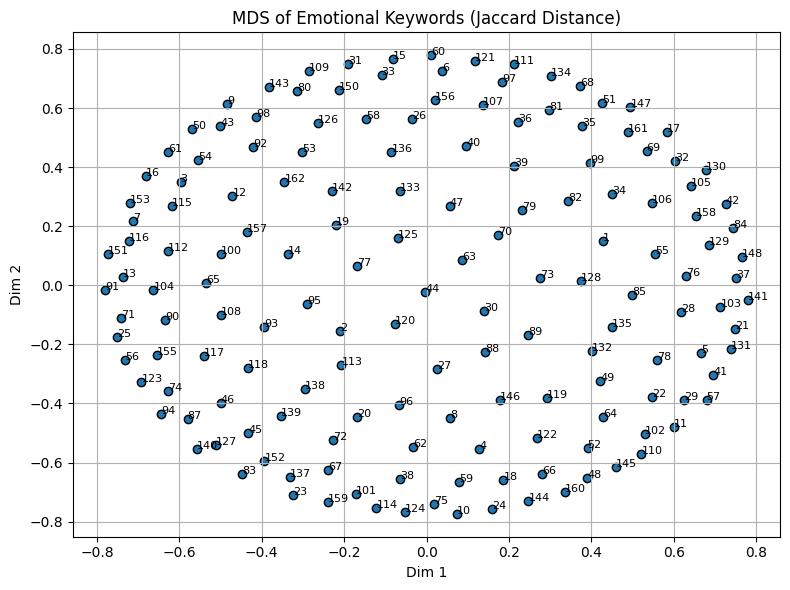

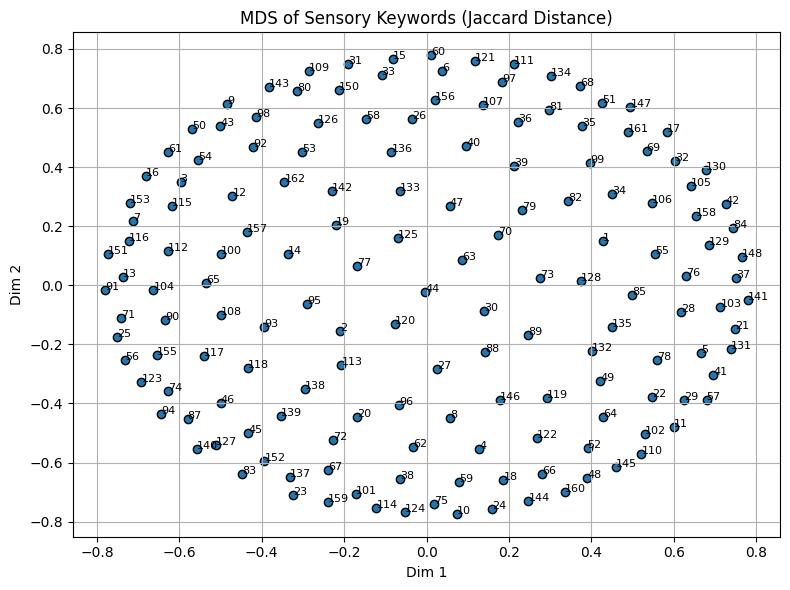

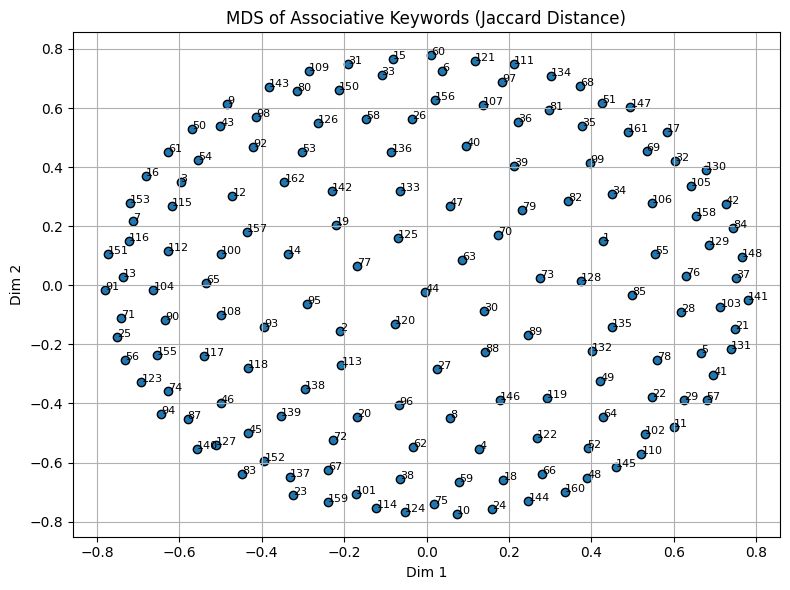

In [5]:
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

for t in types:
    coords = MDS(n_components=2, dissimilarity='precomputed', random_state=42).fit_transform(distance_matrices[t])
    
    plt.figure(figsize=(8, 6))
    plt.scatter(coords[:, 0], coords[:, 1], edgecolor='black')
    
    for i, signal_id in enumerate(signal_ids):
        plt.text(coords[i, 0], coords[i, 1], signal_id, fontsize=8)
    
    plt.title(f"MDS of {t.capitalize()} Keywords (Jaccard Distance)")
    plt.xlabel("Dim 1")
    plt.ylabel("Dim 2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()